## Importing Libraries 📚

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import skew
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Dataset Description 🧾

Age: This is the age of the patient in years.

Sex: This is the gender of the patient. It is represented by the values 0 (female) and 1 (male).

Cp: This is the type of chest pain the patient is experiencing. It is represented by the values 0 (typical angina), 1 (atypical angina), 2 (non-anginal pain), and 3 (asymptomatic).

Trestbps: This is the resting blood pressure of the patient (in mm Hg) when admitted to the hospital.

Chol: This is the serum cholesterol level of the patient (in mg/dL).

Fbs: This is the fasting blood sugar level of the patient (in mg/dL). A value greater than 120 mg/dL indicates the presence of diabetes mellitus.

Restecg: This is the resting electrocardiographic results of the patient. It is represented by the values 0 (normal), 1 (ST-T wave abnormality), and 2 (left ventricular hypertrophy).

Thalach: This is the maximum heart rate achieved by the patient during exercise.

Exang: This is the presence of exercise-induced angina. It is represented by the values 0 (no) and 1 (yes).

Oldpeak: This is the ST depression induced by exercise relative to rest.

Slope: This is the slope of the peak exercise ST segment. It is represented by the values 0 (upsloping), 1 (flat), and 2 (downsloping).

Ca: This is the number of major vessels (0-3) colored by fluoroscopy.

Thal: This is the type of thallium stress test performed. It is represented by the values 0 (normal), 1 (fixed defect), 2 (reversible defect).

Target: This is the presence of heart disease in the patient. It is represented by the values 0 (no) and 1 (yes).

## Reading DataSet

In [2]:
df = pd.read_csv("F:\Hear_predction\dataset.csv")
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Cleaning Data

In [7]:
#1-check for missing values 

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#2-check for duplicated values 

df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#3-check for DataTypes 
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
# 4-convert categorical attrs
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 35.4+ KB


# initial analysis

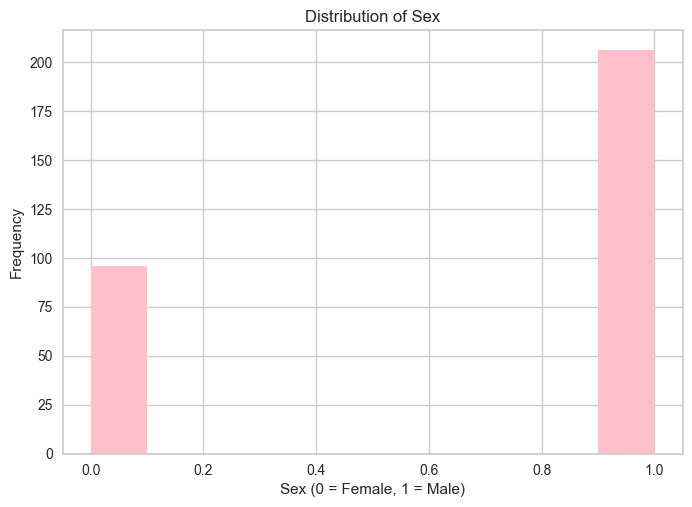

In [15]:
# create a histogram of the sex column
plt.hist(df['sex'],color='pink')

# add labels and title to the plot
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.title('Distribution of Sex')
# show the plot
plt.show()


The distribution of male patients are highest compared to female patients

In [16]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

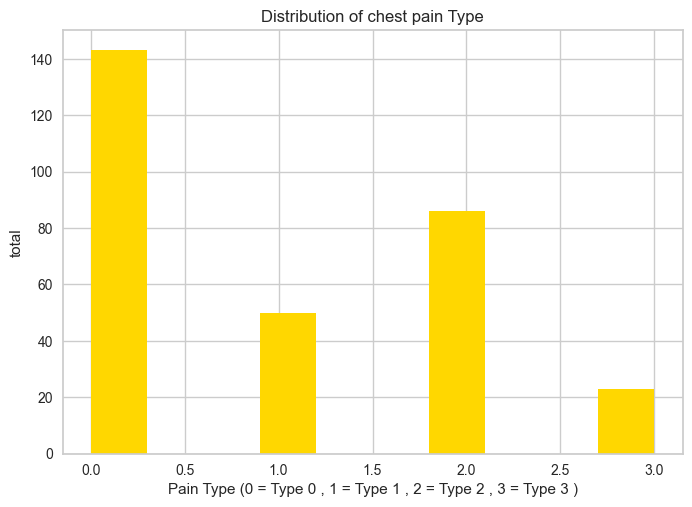

In [17]:
# create a histogram of the sex column
plt.hist(df['cp'],color='gold',rwidth=4)

# add labels and title to the plot
plt.xlabel('Pain Type (0 = Type 0 , 1 = Type 1 , 2 = Type 2 , 3 = Type 3 )')
plt.ylabel('total')
plt.title('Distribution of chest pain Type')

# show the plot
plt.show()


The distribution of Type 0  is highest compared to others Types

In [18]:
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

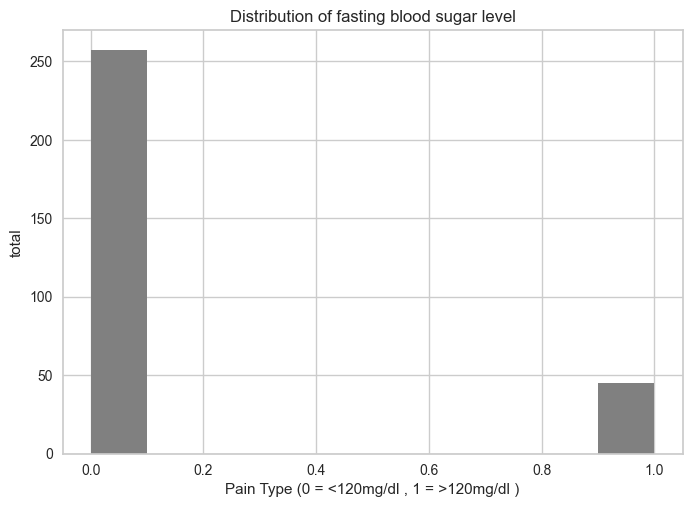

In [19]:
# create a histogram of the sex column
plt.hist(df['fbs'],rwidth=4,color='grey')

# add labels and title to the plot
plt.xlabel('Pain Type (0 = <120mg/dl , 1 = >120mg/dl )')
plt.ylabel('total')
plt.title('Distribution of fasting blood sugar level')

# show the plot
plt.show()

In [20]:
df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

 It can be seen that the number of patients with fasting blood sugar less than 120 mg/dl have the highest numbers.

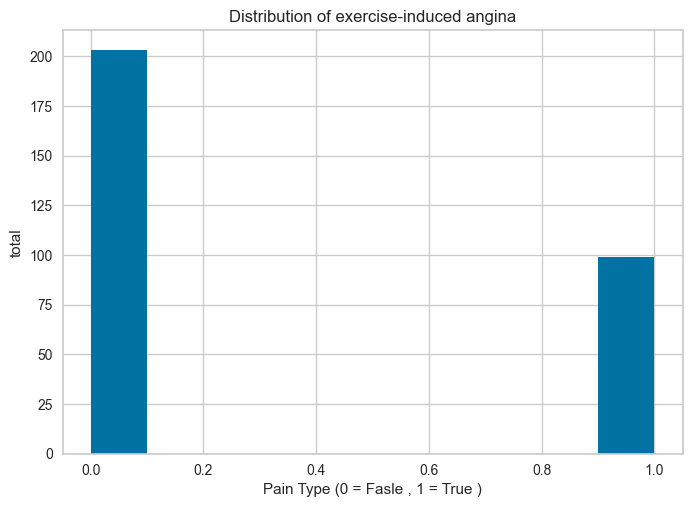

In [21]:
# create a histogram of the sex column
plt.hist(df['exang'],rwidth=4)

# add labels and title to the plot
plt.xlabel('Pain Type (0 = Fasle , 1 = True )')
plt.ylabel('total')
plt.title('Distribution of exercise-induced angina')

# show the plot
plt.show()

as shown in the distrbution the people with no exercie are higher than the people with exercie 

In [22]:
df['exang'].value_counts()

0    203
1     99
Name: exang, dtype: int64

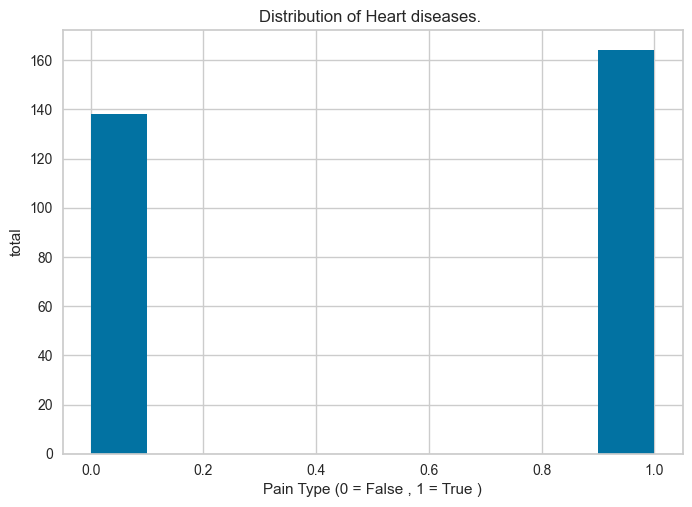

In [23]:
# create a histogram of the sex column
plt.hist(df['target'],rwidth=4)

# add labels and title to the plot
plt.xlabel('Pain Type (0 = False , 1 = True )')
plt.ylabel('total')
plt.title('Distribution of Heart diseases. ')

# show the plot
plt.show()

The total number of patients that have heart diseases are higher than patients that have no heart diseases.

In [24]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [25]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


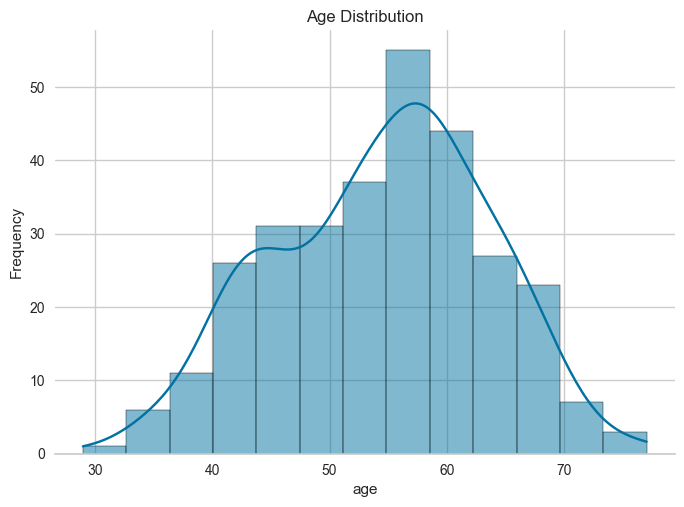

Skewness:  -0.20272991021357126


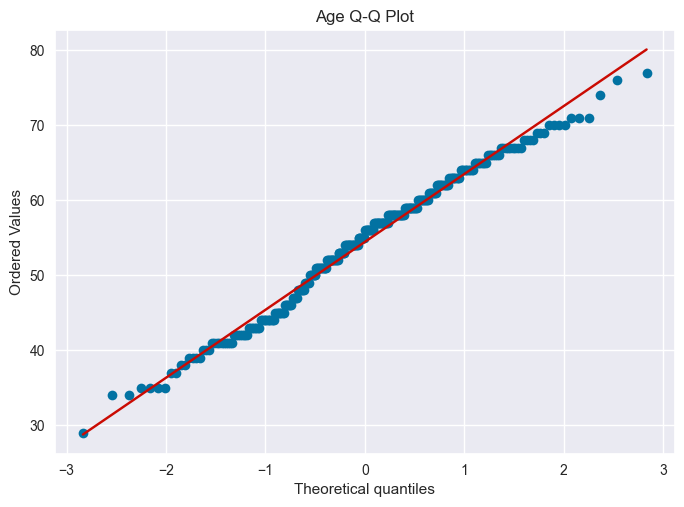

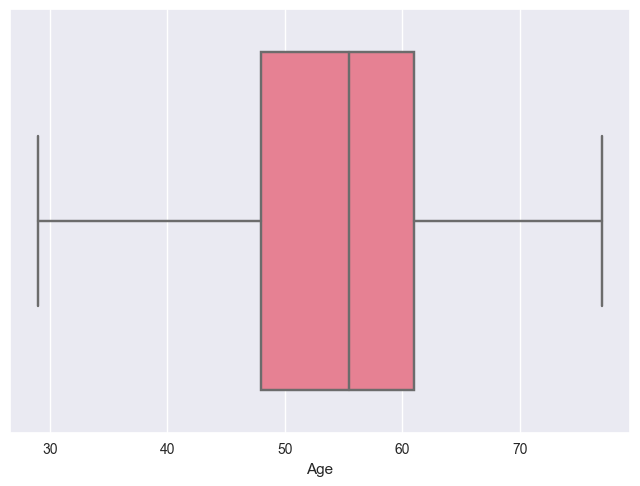

In [26]:
# Plot histogram with KDE using seaborn
sns.histplot(df['age'], kde=True)
sns.set_style('darkgrid')
sns.set_palette('husl')
sns.despine(left=True)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Calculate and print skewness
age_skewness = skew(df['age'])
print("Skewness: ", age_skewness)

# Plot Q-Q plot
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title('Age Q-Q Plot')
plt.show()

# Plot box plot
sns.boxplot(x=df['age'])
plt.xlabel('Age')
plt.show()

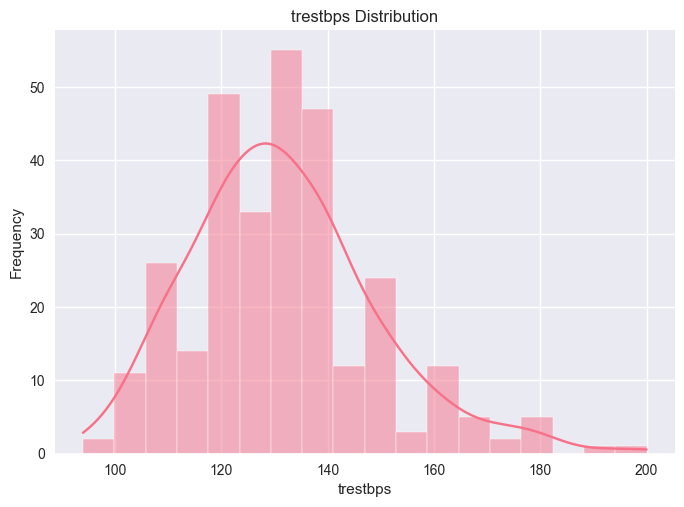

Skewness:  0.7129775303337107


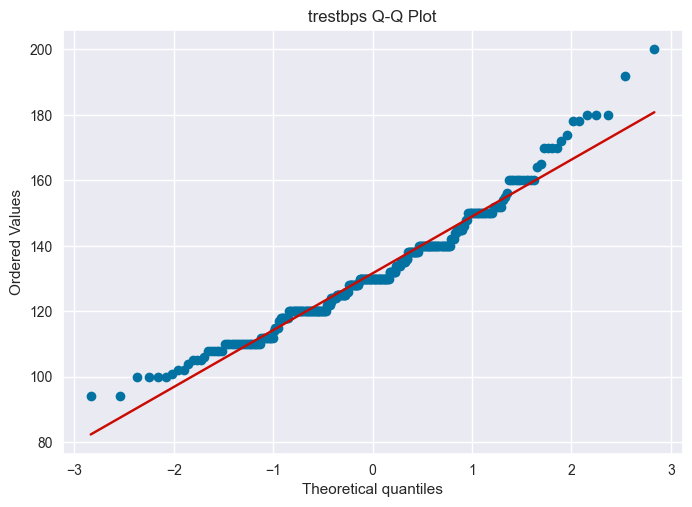

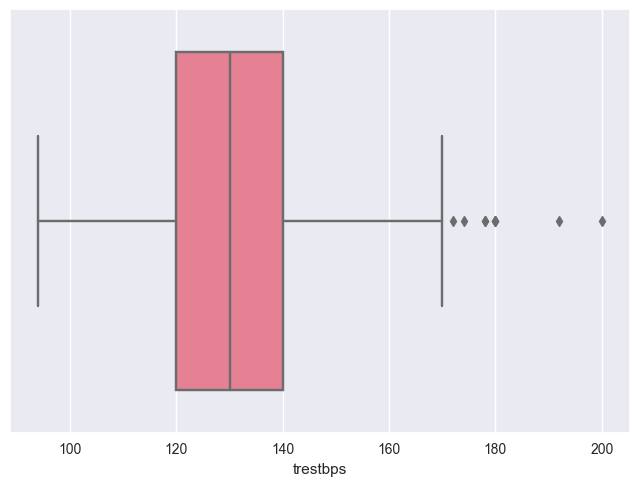

In [27]:
# Plot histogram with KDE using seaborn
sns.histplot(df['trestbps'], kde=True)
sns.set_style('darkgrid')
sns.set_palette('husl')
sns.despine(left=True)
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.title('trestbps Distribution')
plt.show()

# Calculate and print skewness
trestbps_skewness = skew(df['trestbps'])
print("Skewness: ", trestbps_skewness)

# Plot Q-Q plot
stats.probplot(df['trestbps'], dist="norm", plot=plt)
plt.title('trestbps Q-Q Plot')
plt.show()

# Plot box plot
sns.boxplot(x=df['trestbps'])
plt.xlabel('trestbps')
plt.show()

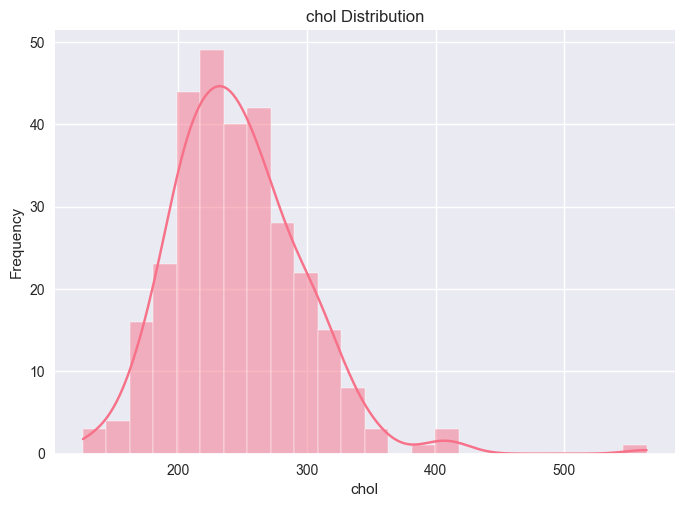

Skewness:  1.1416258623729787


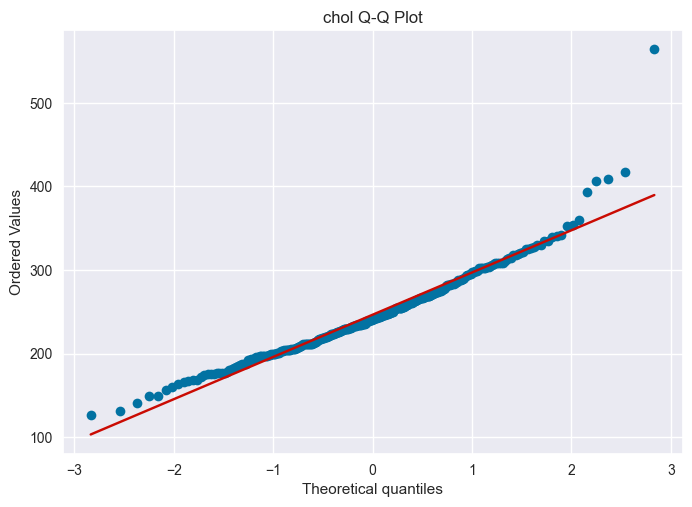

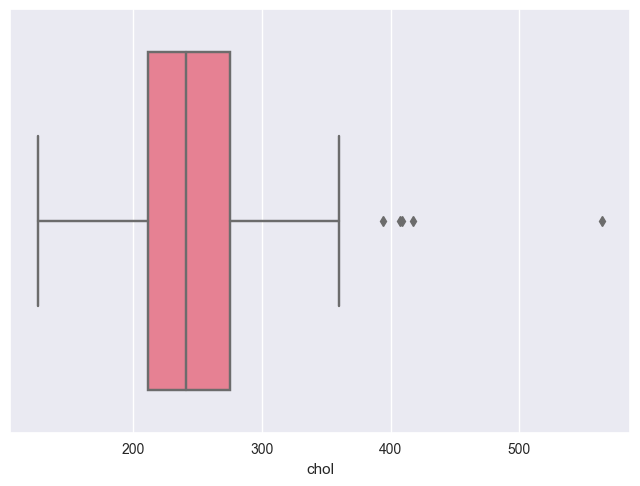

In [28]:
# Plot histogram with KDE using seaborn
sns.histplot(df['chol'], kde=True)
sns.set_style('darkgrid')
sns.set_palette('husl')
sns.despine(left=True)
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.title('chol Distribution')
plt.show()

# Calculate and print skewness
chol_skewness = skew(df['chol'])
print("Skewness: ", chol_skewness)

# Plot Q-Q plot
stats.probplot(df['chol'], dist="norm", plot=plt)
plt.title('chol Q-Q Plot')
plt.show()

# Plot box plot
sns.boxplot(x=df['chol'])
plt.xlabel('chol')
plt.show()

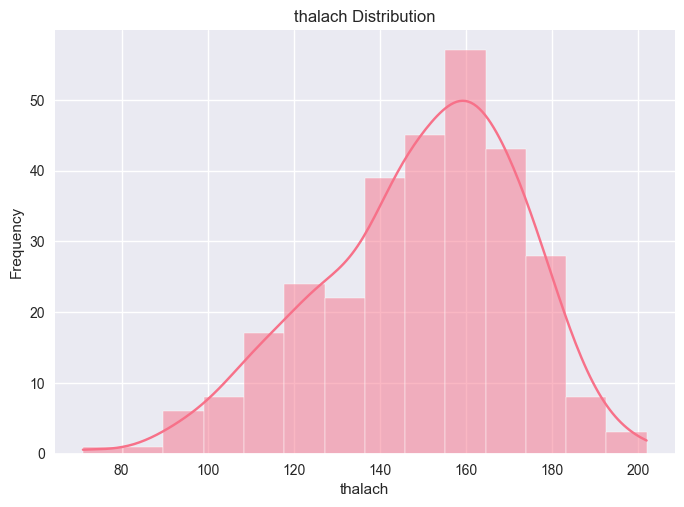

Skewness:  -0.5300218699527914


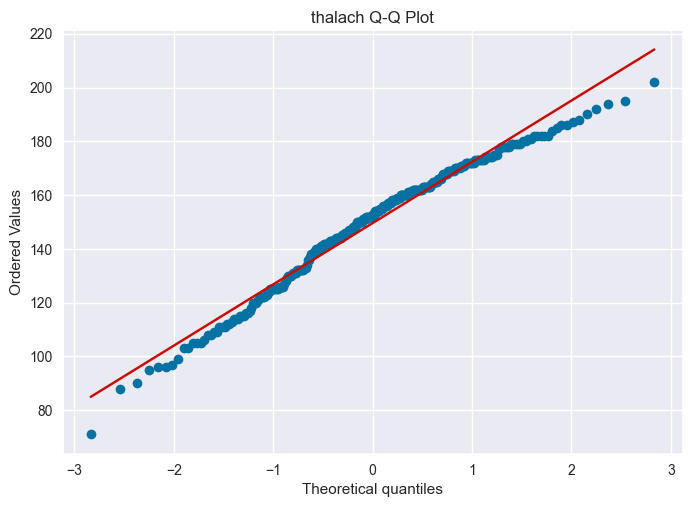

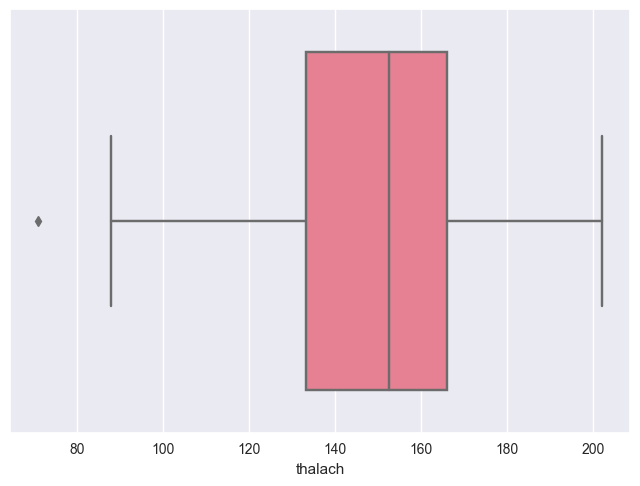

In [29]:
# Plot histogram with KDE using seaborn
sns.histplot(df['thalach'], kde=True)
sns.set_style('darkgrid')
sns.set_palette('husl')
sns.despine(left=True)
plt.xlabel('thalach')
plt.ylabel('Frequency')
plt.title('thalach Distribution')
plt.show()

# Calculate and print skewness
thalach_skewness = skew(df['thalach'])
print("Skewness: ", thalach_skewness)

# Plot Q-Q plot
stats.probplot(df['thalach'], dist="norm", plot=plt)
plt.title('thalach Q-Q Plot')
plt.show()

# Plot box plot
sns.boxplot(x=df['thalach'])
plt.xlabel('thalach')
plt.show()

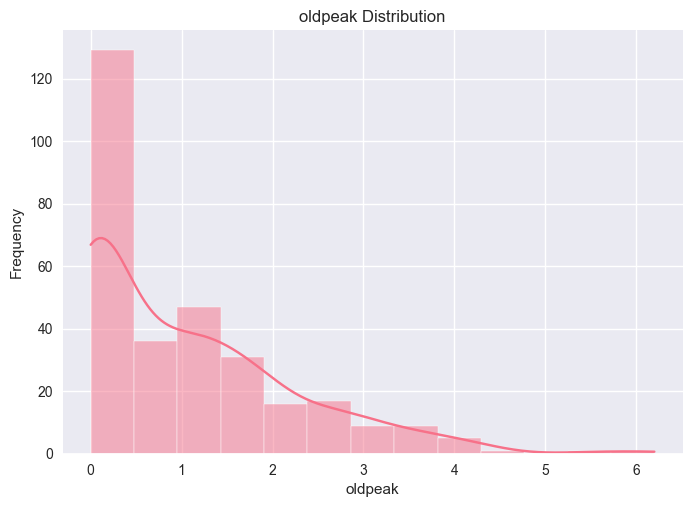

Skewness:  1.259875086599324


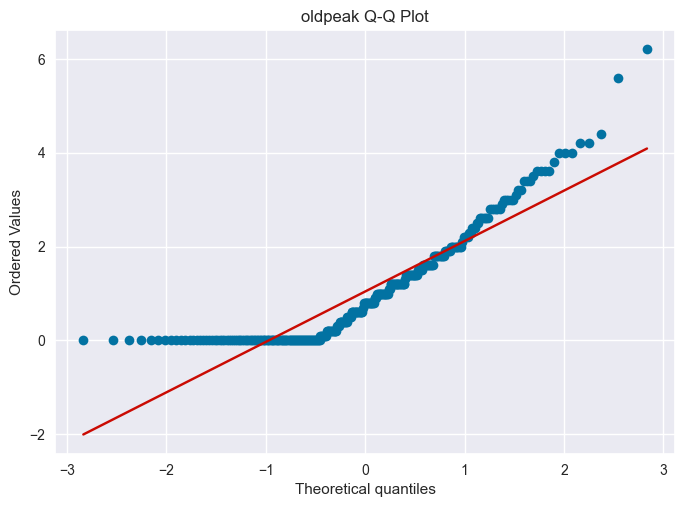

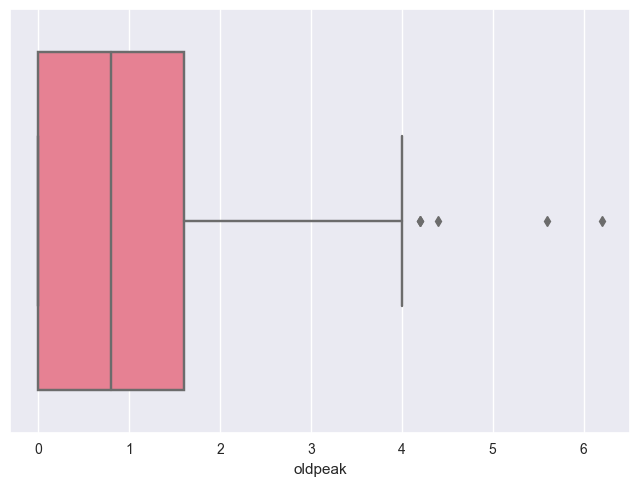

In [30]:
# Plot histogram with KDE using seaborn
sns.histplot(df['oldpeak'], kde=True)
sns.set_style('darkgrid')
sns.set_palette('husl')
sns.despine(left=True)
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.title('oldpeak Distribution')
plt.show()

# Calculate and print skewness
oldpeak_skewness = skew(df['oldpeak'])
print("Skewness: ", oldpeak_skewness)

# Plot Q-Q plot
stats.probplot(df['oldpeak'], dist="norm", plot=plt)
plt.title('oldpeak Q-Q Plot')
plt.show()

# Plot box plot
sns.boxplot(x=df['oldpeak'])
plt.xlabel('oldpeak')
plt.show()

In [31]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [32]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [33]:
df.shape

(302, 14)

# EDA

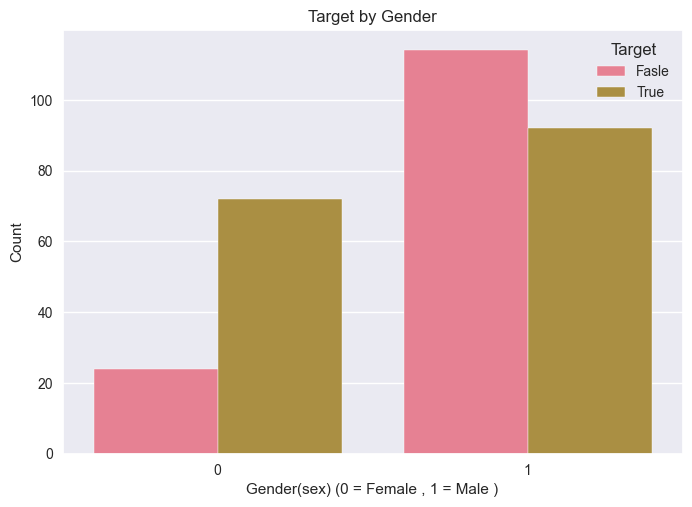

In [34]:
# Create the bar chart using seaborn
sns.countplot(x=df['sex'], hue=df['target'], data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Target by Gender')
plt.legend(title='Target', loc='best', labels=['Fasle', 'True'])
plt.xlabel('Gender(sex) (0 = Female , 1 = Male )')

plt.show()

as shown the highest percentage of hear diases for men 

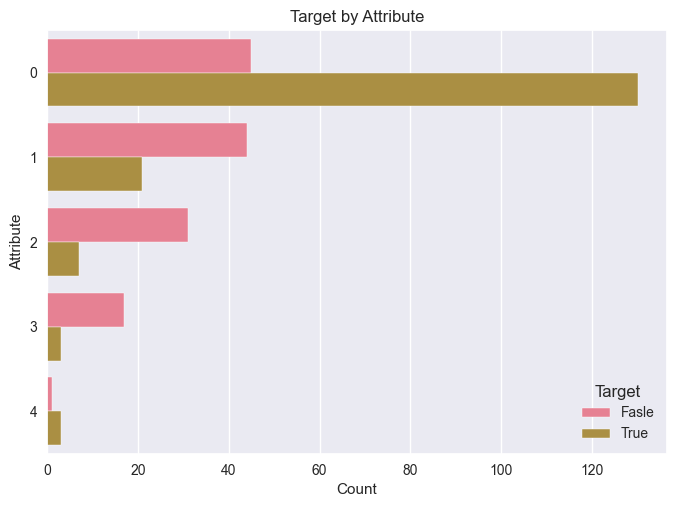

In [35]:
sns.countplot(y='ca', hue='target', data=df)
plt.xlabel('Count')
plt.ylabel('Attribute')
plt.title('Target by Attribute')
plt.legend(title='Target', loc='lower right', labels=['Fasle', 'True'])
plt.show()

type of 0 and 4 the probability of having heart disease is more than 1 to 3

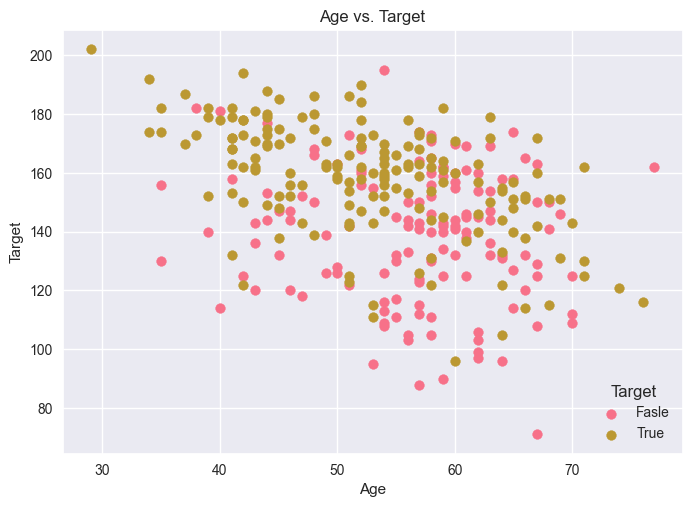

In [36]:
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.xlabel('Age')
plt.ylabel('Target')
plt.title('Age vs. Target')
plt.legend(title='Target', loc='lower right', labels=['Fasle', 'True'])
plt.show()

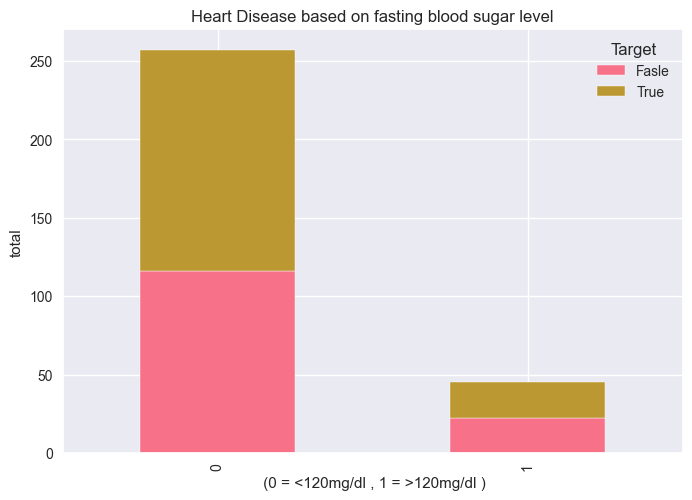

In [37]:
grouped = df.groupby([df.fbs, df.target]).size().unstack()

# Create the stacked bar chart
grouped.plot(kind='bar', stacked=True)
plt.xlabel('fasting blood sugar level')
plt.ylabel('total')
plt.title('Heart Disease based on fasting blood sugar level')
plt.legend(title='Target', loc='best', labels=['Fasle', 'True'])
plt.xlabel(' (0 = <120mg/dl , 1 = >120mg/dl )')
plt.show()

In [38]:
# important
df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

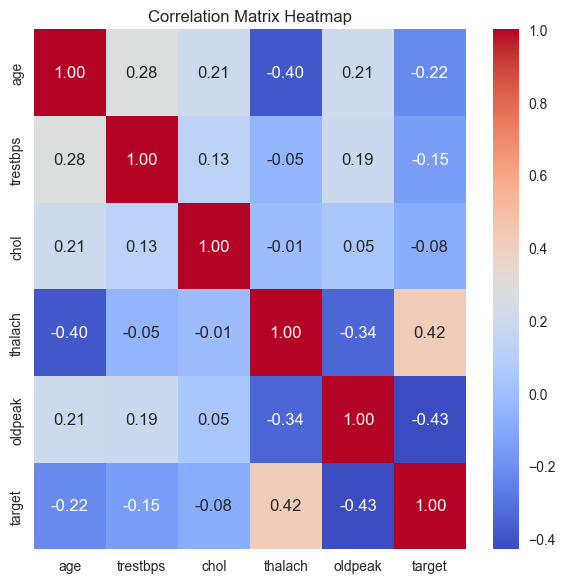

In [39]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [40]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [41]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
223,56,0,0,200,288,1,0,133,1,4.0,...,0,0,0,0,0,0,1,1,0,0
201,60,1,0,125,258,0,0,141,1,2.8,...,0,0,0,0,0,0,1,0,1,0
22,42,1,0,140,226,0,1,178,0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
df.drop(columns=[ 'cp', 'thal', 'slope'],inplace=True)

In [43]:
df.shape

(302, 22)

# Spliting The Data

In [44]:
x = df.drop('target',axis=1)
y = df.target

In [45]:
x= MinMaxScaler().fit_transform(x)

In [46]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)


## Model Implementation

# ----------------------------- Applying Logistic Regression --------------------------------------


In [47]:
LRclassifier = LogisticRegression(max_iter=500, random_state=8, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

In [48]:
LRAcc = accuracy_score(y_pred_LR, y_test)
print('Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100))

Logistic Regression Accuracy: 88.52%


In [49]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



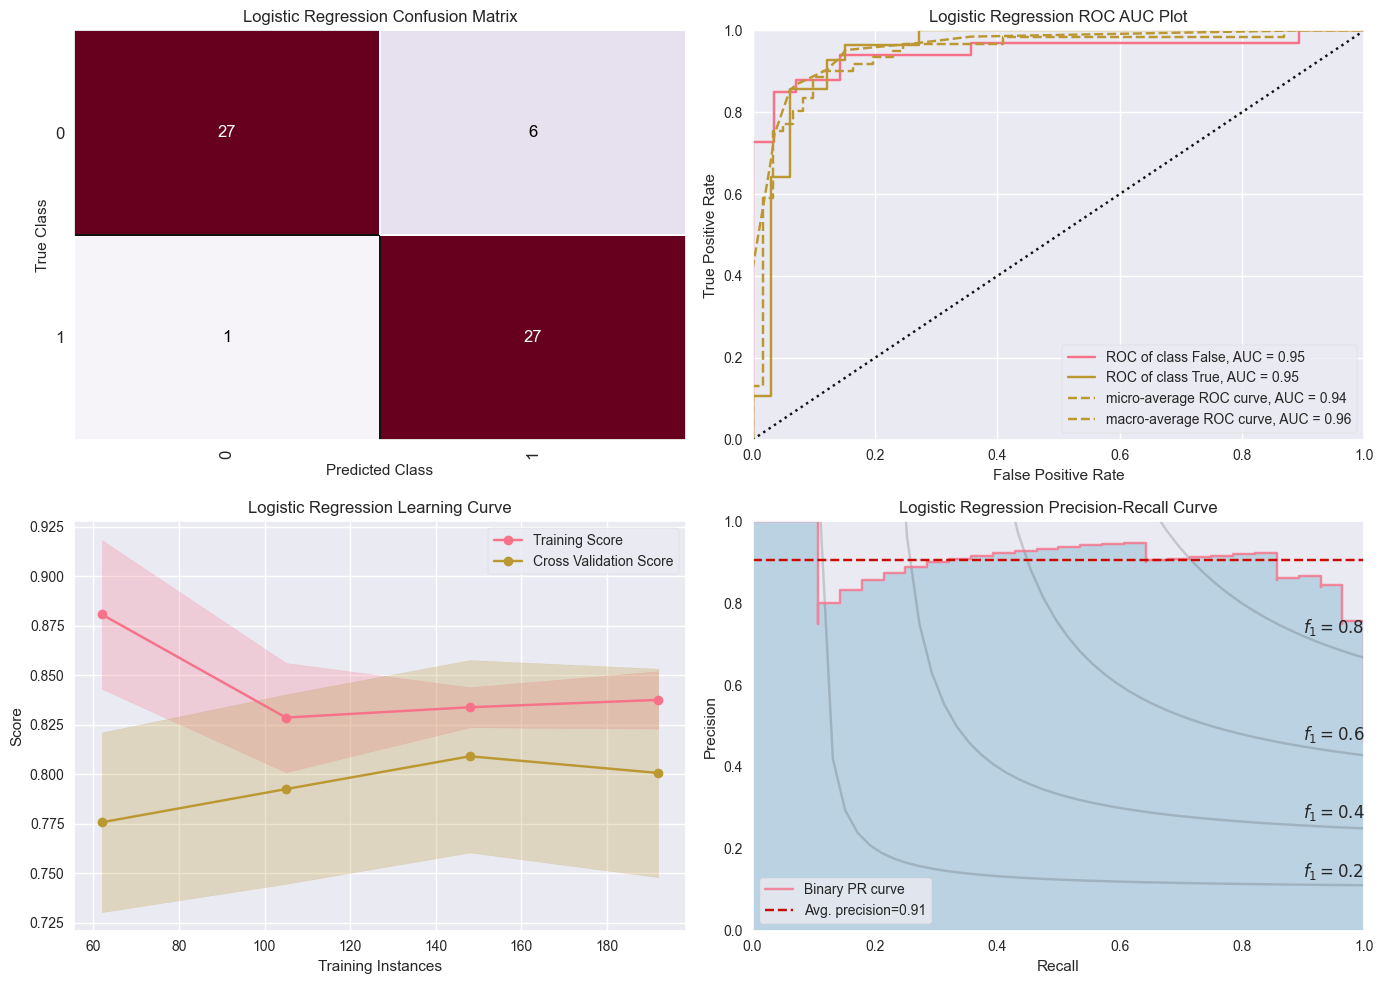

In [50]:
# Plot the confusion matrix
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')

logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()
# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(x_train, y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()

plt.tight_layout();

# ----------------------------- K-Nearest Neighbour (KNN) --------------------------------------


In [51]:
KNNClassifier = KNeighborsClassifier(n_neighbors=4)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

In [52]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100))

K-Nearest Neighbour Accuracy: 81.97%


In [53]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.81      0.79      0.80        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



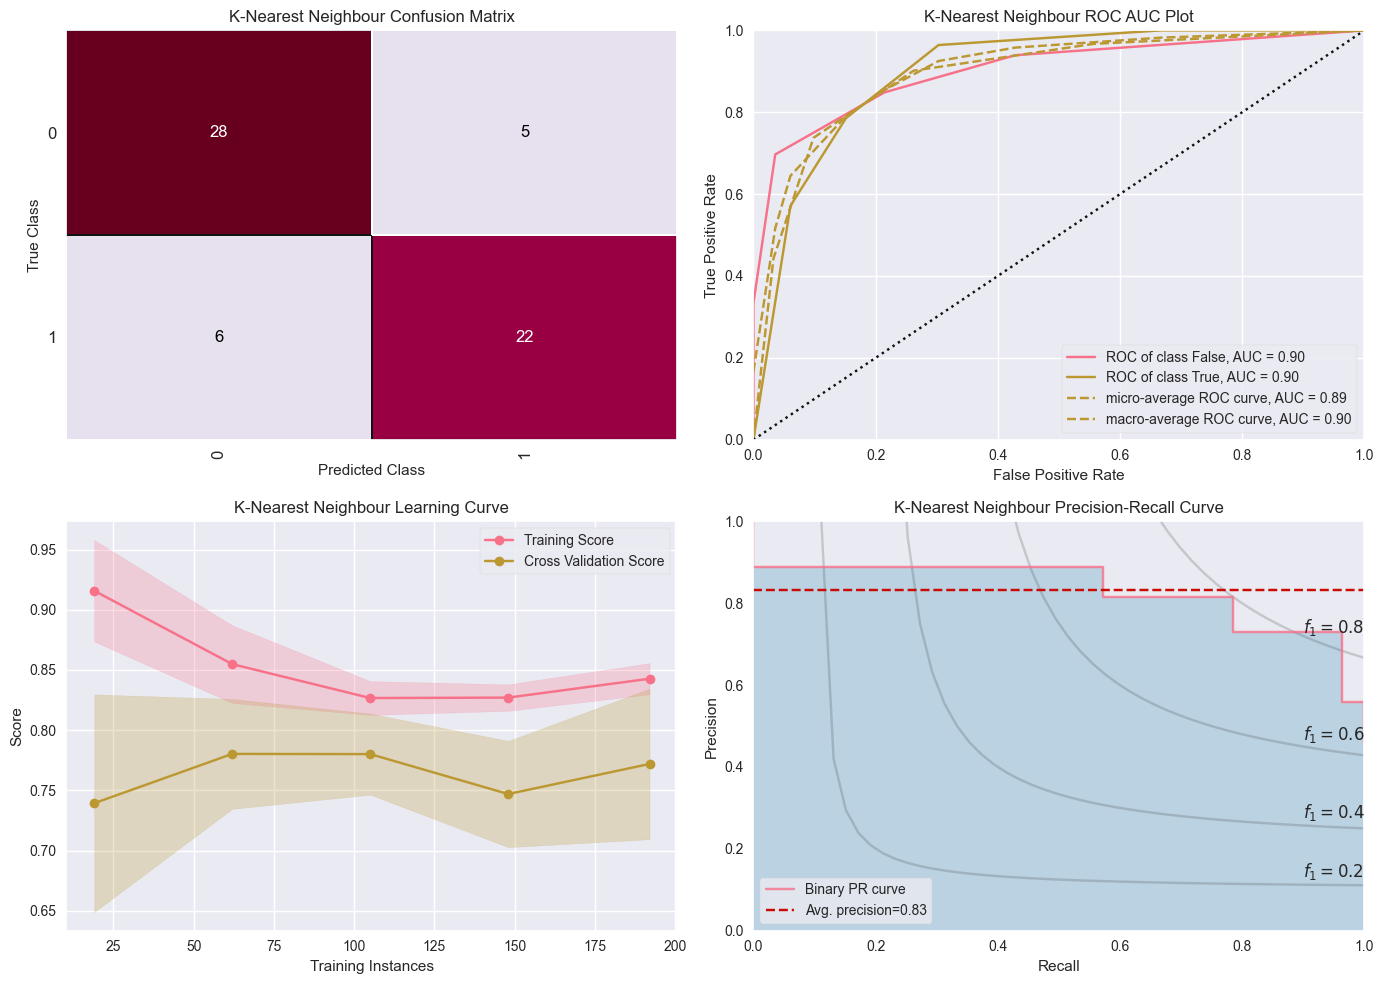

In [54]:
# Plot the confusion matrix
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(x_train, y_train)
knncurve.score(x_test, y_test)
knncurve.finalize()

plt.tight_layout();

# ----------------------------- Support Vector Machine (SVM) ------------------------------------


In [55]:
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

In [56]:
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+'')

Support Vector Machine Accuracy: 85.25%


In [57]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



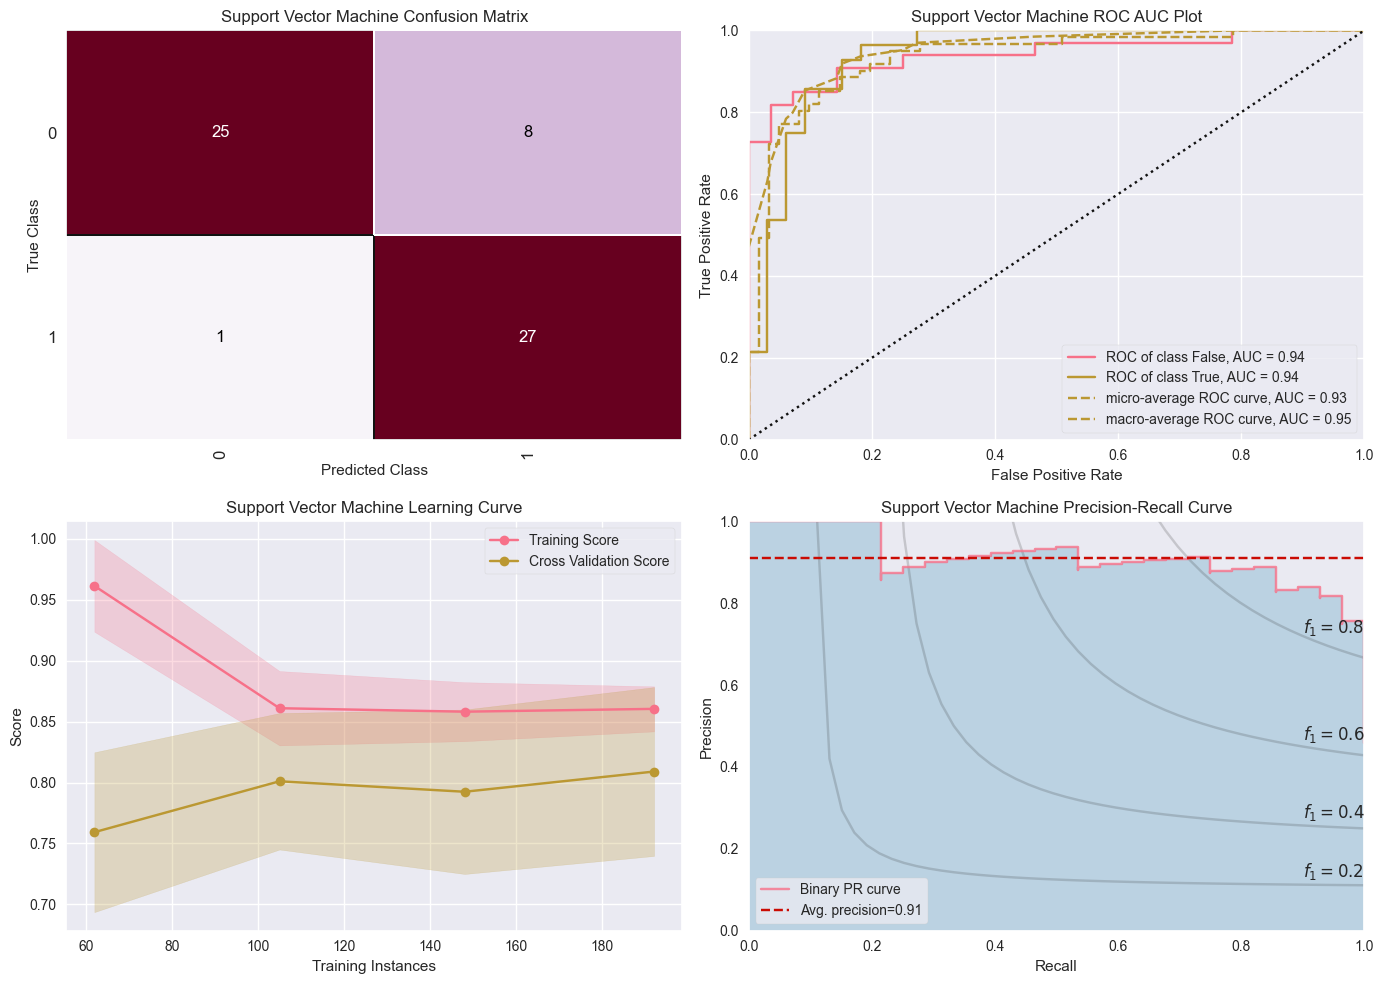

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(x_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(x_train, y_train)
svmcurve.score(x_test, y_test)
svmcurve.finalize()

plt.tight_layout();

# --------------------------------------------- Decision Tree ---------------------------------------------

In [59]:
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

In [60]:
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100))

Decision Tree Accuracy: 91.80%


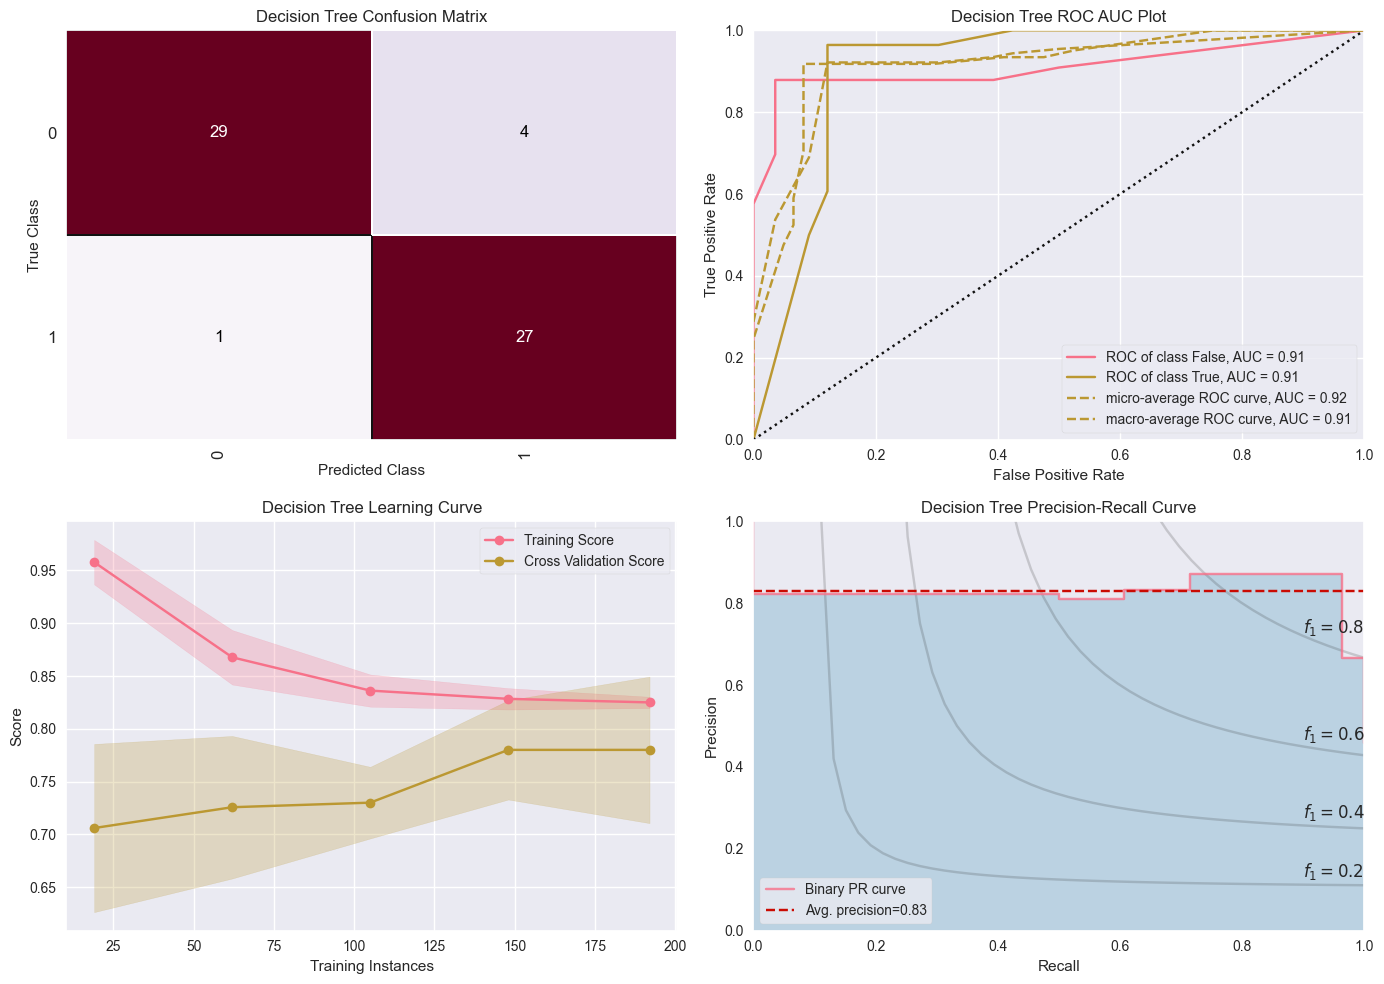

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();

# --------------------------------------------- Random Forest-------------------------------------------

In [62]:
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

In [63]:
RFAcc = accuracy_score(y_pred_RF, y_test)
print('Random Forest Accuracy :'+'\033[1m {:.2f}%'.format(RFAcc*100))

Random Forest Accuracy : 85.25%


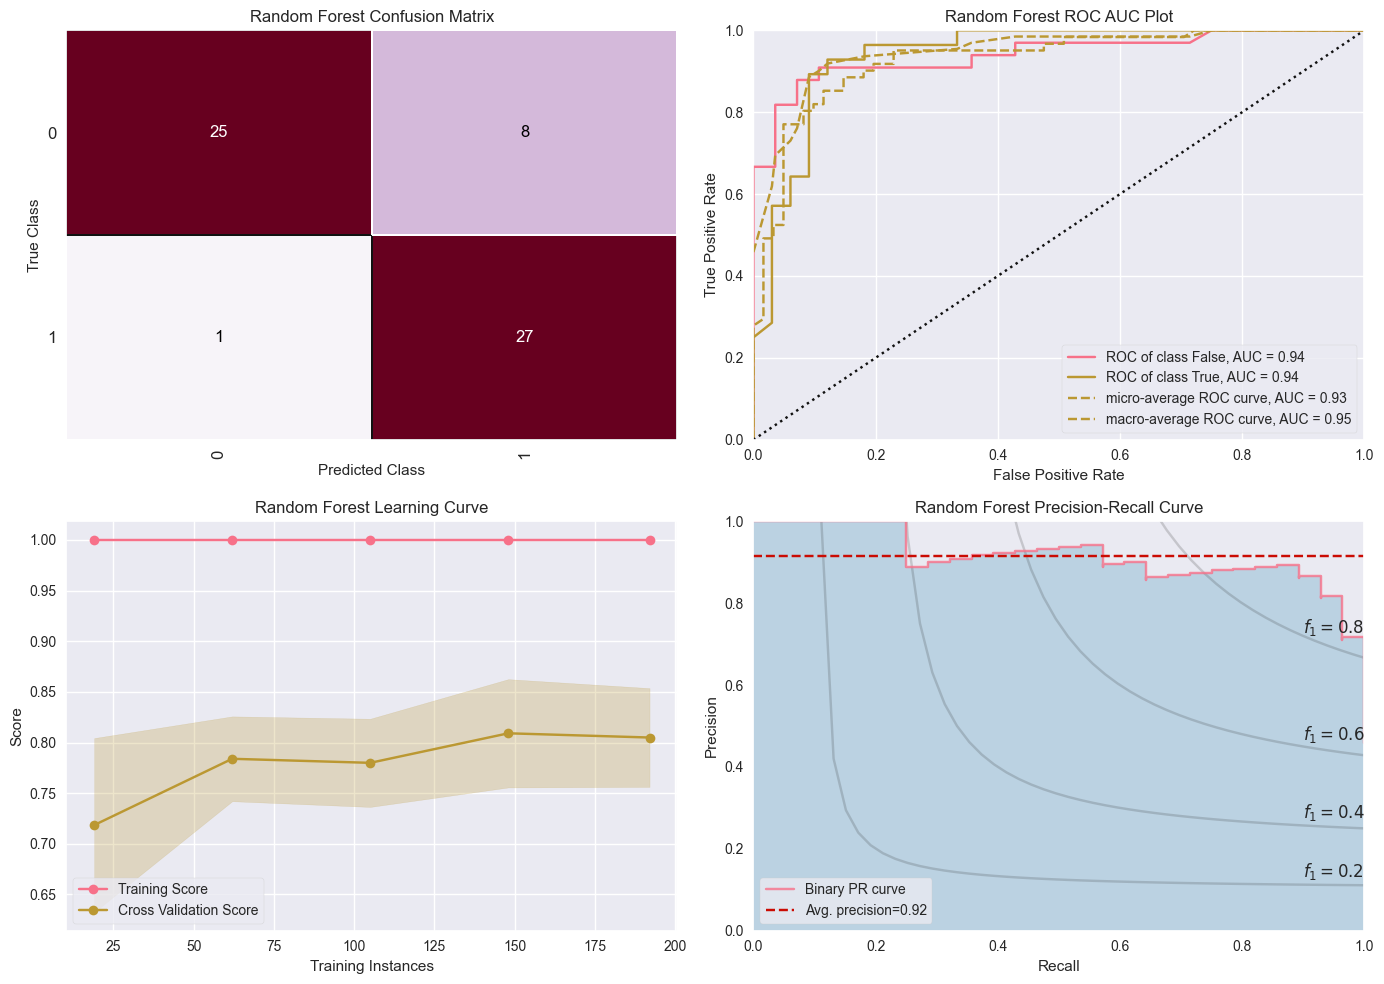

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(x_train, y_train)
rcccurve.score(x_test, y_test)
rcccurve.finalize()

plt.tight_layout();

In [65]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                   'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, DTCAcc*100, RFAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Decision Tree,91.803279
0,Logistic Regression,88.524590
2,Support Vector Machine,85.245902
4,Random Forest,85.245902
1,K-Nearest Neighbour,81.967213


# Saving Model 

In [66]:
DT_model_saving = pickle.dump(DTCclassifier , open('DT_model.sav','wb'))

In [67]:
DT_model_loading = pickle.load(open('DT_model.sav','rb'))

# predction new data point

In [69]:
# Create a tuple
new_data = (58,0,0,130,197,0,1,131,0,0.6,1,0,2)

# Convert the tuple to a Pandas DataFrame
my_dataframe = pd.DataFrame([new_data], columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

# Create dummy variables for categorical columns in new data
cp = pd.get_dummies(my_dataframe['cp'], prefix='cp')
thal = pd.get_dummies(my_dataframe['thal'], prefix='thal')
slope = pd.get_dummies(my_dataframe['slope'], prefix='slope')

# Concatenate the new data and the dummy variables
new_data_df = pd.concat([my_dataframe, cp, thal, slope], axis=1)

# Add missing columns to the new data DataFrame
modified_df = df.drop('target', axis=1)

# Add missing columns to the new data DataFrame
missing_columns = set(modified_df.columns) - set(new_data_df.columns)
for column in missing_columns:
    new_data_df[column] = 0

# Make sure the new data has the same columns as the training data
new_data_df = new_data_df.reindex(columns=modified_df.columns, fill_value=0)

sample_data_array = np.asarray(new_data_df)
sample_data_array_reshape = sample_data_array.reshape(1,-1)

prediction = DT_model_loading.predict(sample_data_array_reshape)
if (prediction[0]==0):
    print('Heart Disease Not Detected')
else:
    print('Heart Disease Detected')



Heart Disease Detected
